In [223]:
import pandas as pd

# data


In [224]:
ailments_data = pd.read_excel('ailments_arabic.xlsx',header = None)
ailments_data.rename(columns = {0:'phrase', 1:'prompt'}, inplace = True)

In [225]:
print("Missing values: ", ailments_data.isnull().sum())
ailments_data = ailments_data.drop_duplicates()

Missing values:  phrase    0
prompt    0
dtype: int64


In [226]:
ailments_data.shape

(151, 2)

# data counts


In [232]:

from collections import Counter
# Number of ailments
print('Number of categories: ', ailments_data['prompt'].nunique())

# Print class distribution
counter = Counter(ailments_data['prompt'])
for k, v in counter.items():
    per = v / len(ailments_data['prompt']) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

Number of categories:  7
Class=Allergy, n=84 (13.907%)
Class=Anemia, n=112 (18.543%)
Class=Bronchitis, n=64 (10.596%)
Class=Diarrhea, n=48 (7.947%)
Class=Fatigue, n=80 (13.245%)
Class=Flu, n=124 (20.530%)
Class=Stress, n=92 (15.232%)


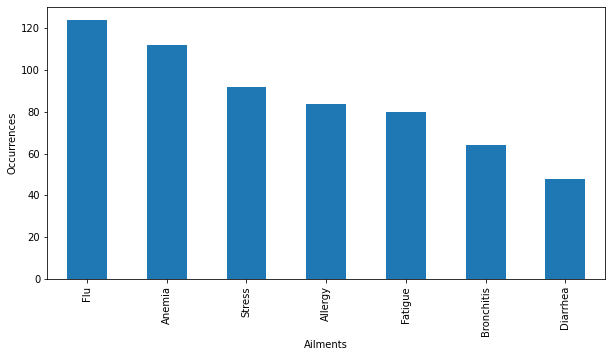

In [233]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
ailments_data['prompt'].value_counts().plot(kind='bar')
plt.xlabel('Ailments')
plt.ylabel('Occurrences')
plt.show()

# data aug


In [220]:
pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 4.9 MB/s 


In [229]:
ailments_data

,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy
...,...,...
147,أنا قلق جدا,Stress
148,أريد أن أنام، أنا نعسان,Stress
149,الانزعاج والقلق التي احس بها من النوع الذي يظه...,Stress
150,أشعر بالحزن والاحباط,Stress


In [230]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

def dataAugFun(ailments_data, N):


  aug_data = ailments_data.head(0)

  texts = ailments_data['phrase']
  for ind in ailments_data.index:
      texts = ailments_data['phrase'][ind]
      label = ailments_data['prompt'][ind]
      aug = naw.RandomWordAug(action="swap")
      augmented_text = aug.augment(texts,n=N)
      
      for string in augmented_text:
        aug_data = aug_data.append({'phrase' : string,
                        'prompt' : label} , 
                        ignore_index=True)

    
  return aug_data

In [231]:
ailments_data = dataAugFun(ailments_data , 4)

ailments_data

,phrase,prompt
0,أعاني أنا من في صعوبة و التنفس التكلم و البلع,Allergy
1,أعاني أنا من صعوبة في التنفس التكلم و البلع و,Allergy
2,أعاني أنا من صعوبة و في التنفس التكلم و البلع,Allergy
3,أنا من أعاني صعوبة التنفس في و و التكلم البلع,Allergy
4,أنا أعاني من الاسهال القيء و و ألم في المعدة,Allergy
...,...,...
599,أشعر والاحباط بالحزن,Stress
600,لا النوم أستطيع فترة خلال الامتحانات,Stress
601,لا أستطيع خلال النوم الامتحانات فترة,Stress
602,أستطيع لا النوم خلال الامتحانات فترة,Stress


# preprocess


In [234]:
ailments_data

,phrase,prompt
0,أعاني أنا من في صعوبة و التنفس التكلم و البلع,Allergy
1,أعاني أنا من صعوبة في التنفس التكلم و البلع و,Allergy
2,أعاني أنا من صعوبة و في التنفس التكلم و البلع,Allergy
3,أنا من أعاني صعوبة التنفس في و و التكلم البلع,Allergy
4,أنا أعاني من الاسهال القيء و و ألم في المعدة,Allergy
...,...,...
599,أشعر والاحباط بالحزن,Stress
600,لا النوم أستطيع فترة خلال الامتحانات,Stress
601,لا أستطيع خلال النوم الامتحانات فترة,Stress
602,أستطيع لا النوم خلال الامتحانات فترة,Stress


In [235]:

from sklearn import preprocessing
import numpy

#rename columns
DATA_COLUMN = "text"
LABEL_COLUMN = "label"
ailments_data.rename(columns = {0:'phrase', 1:'prompt'}, inplace = True)
ailments_data.columns = [DATA_COLUMN, LABEL_COLUMN]

# Convert labels to numbers

le = preprocessing.LabelEncoder()
le.fit(ailments_data[LABEL_COLUMN])

le.classes_


y = le.transform(ailments_data[LABEL_COLUMN])
# print(le.inverse_transform(y))


# compare before and after
print(ailments_data[LABEL_COLUMN].value_counts())
unique, counts = numpy.unique(y, return_counts=True)
afterEncoder = dict(zip(unique, counts))
dict(sorted(afterEncoder.items(), key=lambda item: item[1], reverse=True))

ailments_data[LABEL_COLUMN]=y

Flu           124
Anemia        112
Stress         92
Allergy        84
Fatigue        80
Bronchitis     64
Diarrhea       48
Name: label, dtype: int64


In [236]:
ailments_data

,text,label
0,أعاني أنا من في صعوبة و التنفس التكلم و البلع,0
1,أعاني أنا من صعوبة في التنفس التكلم و البلع و,0
2,أعاني أنا من صعوبة و في التنفس التكلم و البلع,0
3,أنا من أعاني صعوبة التنفس في و و التكلم البلع,0
4,أنا أعاني من الاسهال القيء و و ألم في المعدة,0
...,...,...
599,أشعر والاحباط بالحزن,6
600,لا النوم أستطيع فترة خلال الامتحانات,6
601,لا أستطيع خلال النوم الامتحانات فترة,6
602,أستطيع لا النوم خلال الامتحانات فترة,6


In [ ]:
pip install qalsadi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 5.1 MB/s 
     |████████████████████████████████| 138 kB 45.0 MB/s 
     |████████████████████████████████| 332 kB 67.7 MB/s 
     |████████████████████████████████| 9.2 MB 42.4 MB/s 
     |████████████████████████████████| 126 kB 64.1 MB/s 
     |████████████████████████████████| 353 kB 46.7 MB/s 
     |████████████████████████████████| 51 kB 398 kB/s 
     |████████████████████████████████| 251 kB 64.9 MB/s 
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4271 sha256=ca9220e601ca1e385c2eafcb0bf44dba9837ff4ed127fbdeb05cff562e809acc
  Stored in directory: /root/.cache/pip/wheels/08/34/42/9a7f94099208ce3d32638d98586a5a50f821db2fc75a3bdaae
Successfully built pickledb


In [237]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import qalsadi.lemmatizer
%pip install nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


def text_transform(message):

    # (a) change the message to lowercase
    message = message.lower()

    # (b) tokenize the message,
    # i.e. if input = 'i am a student.'
    # then, output  = ['i', 'am', 'a', 'student', '.']
    message = nltk.word_tokenize(message)

    # (c) remove special characters in the message
    msg_temp = []
    for word in message:
        # only accpet the alpha-numeric words and remove all other cases e.g. special characters
        if word.isalnum():
            msg_temp.append(word)

    message = msg_temp

    # (d) remove stopwords and punctuations
    msg_temp = []
    for word in message:
        if word not in stopwords.words('arabic') and word not in string.punctuation:
            msg_temp.append(word)

    message = msg_temp

    # (e) lemmatization function
    lemmer = qalsadi.lemmatizer.Lemmatizer()
    msg_temp = []
    for word in message:
        msg_temp.append(lemmer.lemmatize(word))

    # join all words with space and return new message
    new_message = " ".join(msg_temp)

    return new_message


ailments_data
# apply the pre-processing steps via text_transform() function on text data
ailments_data['transformed_phrase'] = ailments_data[DATA_COLUMN].apply(
    text_transform)

X = ailments_data.transformed_phrase
X.tail()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Exception ignored in: <function WordFreqDictionary.__del__ at 0x7f9caeeea680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/arramooz/wordfreqdictionaryclass.py", line 130, in __del__
    self.db_connect.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140311773259648 and this is thread id 140311378024192.
Exception ignored in: <function ArabicDictionary.__del__ at 0x7f9cad90add0>
Traceback (most recent call

599             شعر والاحباط حزن
600    نوم أطاع فترة خلال امتحان
601    أطاع خلال نوم امتحان فترة
602    أطاع نوم خلال امتحان فترة
603    نوم أطاع خلال امتحان فترة
Name: transformed_phrase, dtype: object

    self.db_connect.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140311773259648 and this is thread id 140311378024192.
Exception ignored in: <function ArabicDictionary.__del__ at 0x7f9cad90add0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/arramooz/arabicdictionary.py", line 112, in __del__
    self.db_connect.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140311773259648 and this is thread id 140311378024192.


In [238]:
ailments_data

,text,label,transformed_phrase
0,أعاني أنا من في صعوبة و التنفس التكلم و البلع,0,عانة صعوبة تنفس تكلم بلع
1,أعاني أنا من صعوبة في التنفس التكلم و البلع و,0,عانة صعوبة تنفس تكلم بلع
2,أعاني أنا من صعوبة و في التنفس التكلم و البلع,0,عانة صعوبة تنفس تكلم بلع
3,أنا من أعاني صعوبة التنفس في و و التكلم البلع,0,عانة صعوبة تنفس تكلم بلع
4,أنا أعاني من الاسهال القيء و و ألم في المعدة,0,عانة الاسهال قيء لم معد
...,...,...,...
599,أشعر والاحباط بالحزن,6,شعر والاحباط حزن
600,لا النوم أستطيع فترة خلال الامتحانات,6,نوم أطاع فترة خلال امتحان
601,لا أستطيع خلال النوم الامتحانات فترة,6,أطاع خلال نوم امتحان فترة
602,أستطيع لا النوم خلال الامتحانات فترة,6,أطاع نوم خلال امتحان فترة


# data visualization


Total number of unique words : 307
Counter({'لد': 260, 'شعر': 80, 'جدا': 60, 'صعوبة': 56, 'صداع': 36, 'تنفس': 32, 'معد': 32, 'جد': 32, 'عندما': 28, 'أطاع': 28, 'حلق': 28, 'أنام': 28, 'جلد': 24, 'عانة': 20, 'لم': 20, 'قد': 20, 'قلب': 20, 'رأس': 20, 'فقد': 20, 'آلام': 20, 'غثيان': 20, 'حمى': 20, 'حس': 16, 'شديد': 16, 'جاف': 16, 'شاحب': 16, 'شهي': 16, 'دار': 16, 'تركيز': 16, 'سعل': 16, 'أراد': 16, 'بلع': 12, 'الاسهال': 12, 'سريع': 12, 'صبح': 12, 'حك': 12, 'حساس': 12, 'ضد': 12, 'عين': 12, 'جيد': 12, 'أنف': 12, 'سيلان': 12, 'كنت': 12, 'خفقان': 12, 'سرع': 12, 'جسم': 12, 'شكل': 12, 'ضعف': 12, 'ليل': 12, 'يألمني': 12, 'نوم': 12, 'انا': 12, 'ذراع': 12, 'ساق': 12, 'نعسان': 12, 'التهاب': 12, 'عرق': 12, 'مشاكل': 12, 'غضب': 12, 'قلق': 12, 'تكلم': 8, 'قيء': 8, 'غمة': 8, 'أن': 8, 'عطس': 8, 'رقبة': 8, 'غبار': 8, 'مواد': 8, 'بشر': 8, 'يد': 8, 'تقيأ': 8, 'ظهر': 8, 'وجه': 8, 'أضاع': 8, 'ولد': 8, 'أظافر': 8, 'ضعيف': 8, 'بيئة': 8, 'حول': 8, 'داق': 8, 'معتاد': 8, 'راسي': 8, 'استيقظ': 8, 'متزايد': 8, 'بضع': 

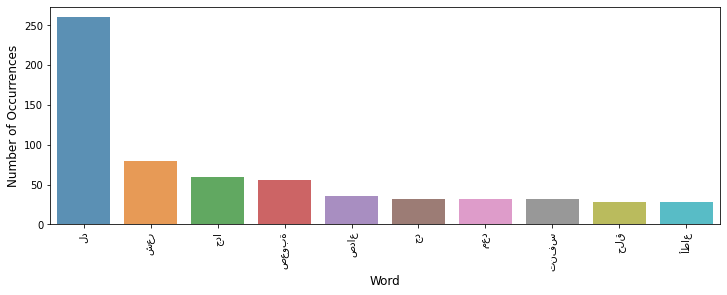

In [239]:
import seaborn as sns
# count unique words

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(ailments_data['transformed_phrase'])

#counter = counter_word(ailments_data[DATA_COLUMN])

num_unique_words = len(counter)
print("Total number of unique words : " + str(num_unique_words))

print(counter)

counted_df = pd.DataFrame(counter.items(), columns=['word', 'count']).sort_values(
    'count', ascending=False).reset_index(drop=True)  # create new df from counter

plt.figure(figsize=(12, 4))
# plot only the top 10 by slicing the df
sns.barplot(data=counted_df[:10], x='word', y='count', alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# vectorize

In [240]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec

In [241]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def get_max_input_length(docs):
    max_input_length = 1
    for document in docs:
        words = text_to_word_sequence(document)
        document_length = len(words)
        if document_length > max_input_length:
            max_input_length = document_length

    return max_input_length

In [242]:
# prepare tokenizer

t = Tokenizer()
t.fit_on_texts(ailments_data['transformed_phrase'])
vocab_size = len(t.word_index) + 1
 # integer encode the documents
encoded_docs = t.texts_to_sequences(ailments_data['transformed_phrase'])
print('encoded_docs:\n',max(encoded_docs))

max_length = 0

for doc in encoded_docs:
  if len(doc) > max_length:
    max_length = len(doc)


# pad documents to a max length of 4 words
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print('padded_docs:\n',padded_docs)

encoded_docs:
 [297, 296, 60, 298, 72, 299, 300, 301, 302, 114]
padded_docs:
 [[ 14   4   6 ...   0   0   0]
 [ 14   4   6 ...   0   0   0]
 [ 14   4   6 ...   0   0   0]
 ...
 [ 10 306  51 ...   0   0   0]
 [ 10  51 306 ...   0   0   0]
 [ 51  10 306 ...   0   0   0]]


In [249]:
padded_docs.shape[1]

13

In [248]:
import pandas as pd
import numpy as np

df = pd.DataFrame(padded_docs)
df['label'] = ailments_data[LABEL_COLUMN]
df.iloc[:,:10]

df=df.dropna()

# data split


In [250]:
from sklearn.model_selection import train_test_split
#xtrain,ytrain, test = train_test_split(df, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:padded_docs.shape[1]], df['label'], test_size=0.15, random_state=42)
# # all_datasets.append(data_Hard)

# New Section

In [251]:

y_train =y_train.astype('category')

In [252]:
y_train.dropna()
np.any(np.isnan(y_train)) #and gets False
#np.isfinite(y_train.all()) #and gets True

TypeError: ignored

In [253]:
#y_train=y_train.dropna()
y_train.isna().sum()
#y_train

#y_train=y_train.dropna()
#X_train.isna().sum()
#y_train

0

In [254]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
549,21,1,291,0,0,0,0,0,0,0,0,0,0
60,1,41,42,0,0,0,0,0,0,0,0,0,0
300,19,16,99,0,0,0,0,0,0,0,0,0,0
259,203,6,202,0,0,0,0,0,0,0,0,0,0
280,1,15,7,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,142,71,143,145,144,0,0,0,0,0,0,0,0
106,63,0,0,0,0,0,0,0,0,0,0,0,0
270,98,7,15,205,0,0,0,0,0,0,0,0,0
435,258,101,260,64,259,25,1,11,3,0,0,0,0


In [255]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [256]:
print(clf.predict( X_test.iloc[0,:].values.reshape(1,-1) )) 

[1]


In [257]:
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [262]:
Y_pred = clf.predict(X_test)  
score = compute_accuracy(y_test, Y_pred)  

In [263]:
score

0.4775828460038986

In [260]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
110,161,3,27,1,0,0,0,0,0,0,0,0,0
452,5,1,0,0,0,0,0,0,0,0,0,0,0
568,12,49,0,0,0,0,0,0,0,0,0,0,0
77,1,36,24,149,148,150,0,0,0,0,0,0,0
181,2,1,87,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,82,83,28,9,0,0,0,0,0,0,0,0,0
218,185,2,186,93,0,0,0,0,0,0,0,0,0
591,31,12,55,0,0,0,0,0,0,0,0,0,0
210,1,184,92,0,0,0,0,0,0,0,0,0,0


In [261]:
y_test

110    1
452    5
568    6
77     0
181    1
      ..
155    1
218    2
591    6
210    2
235    2
Name: label, Length: 91, dtype: int64